# Тепловая карта средней температуры воздуха города Базель по часам в зависимости от месяца

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
import calendar
pd.set_option('max_colwidth', 120)
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import glob
import locale
import matplotlib.colors as mcolors

**Чтение файла**

In [2]:
temp = pd.read_csv("data.csv")


In [3]:
temp.head(10)

,location,Базель
0,lat,47.75000
1,lon,7.50000
2,asl,363.653
3,variable,Temperature
4,unit,°C
5,level,2 m elevation corrected
6,resolution,hourly
7,aggregation,None
8,timestamp,Базель Temperature [2 m elevation corrected]
9,20230101T0000,12.270246


In [4]:
#удалим верхние строки без данных о температуре
temp=temp[9:]
temp.head(10)

,location,Базель
9,20230101T0000,12.270246
10,20230101T0100,12.340245
11,20230101T0200,11.840245
12,20230101T0300,11.550245
13,20230101T0400,11.260245
14,20230101T0500,10.990245
15,20230101T0600,10.350245
16,20230101T0700,10.090245
17,20230101T0800,10.400246
18,20230101T0900,12.050245


In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 9 to 10712
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  10704 non-null  object
 1   Базель    10512 non-null  object
dtypes: object(2)
memory usage: 167.4+ KB


**Переименуем столбцы**

In [6]:
temp = temp.rename(columns = {'location':'date_time','Базель':'t'})

In [7]:
temp.head()

,date_time,t
9,20230101T0000,12.270246
10,20230101T0100,12.340245
11,20230101T0200,11.840245
12,20230101T0300,11.550245
13,20230101T0400,11.260245


**Исправим форматы**

In [8]:
temp['date_time'] = pd.to_datetime(temp['date_time'])

In [9]:
temp['t'] = temp['t'].astype('float')

**Добавим столбцы**

In [10]:
temp['year_month'] = temp['date_time'].dt.strftime('%Y-%m')

In [11]:
temp['time'] = temp['date_time'].dt.strftime('%H:%M')

In [12]:
temp.head()

,date_time,t,year_month,time
9,2023-01-01 00:00:00,12.270246,2023-01,00:00
10,2023-01-01 01:00:00,12.340245,2023-01,01:00
11,2023-01-01 02:00:00,11.840245,2023-01,02:00
12,2023-01-01 03:00:00,11.550245,2023-01,03:00
13,2023-01-01 04:00:00,11.260245,2023-01,04:00


**Создадим сводную за 2023 год для тепловой карты**

In [13]:
#посчитаем среднее значение температуры по часам внутри месяца 
temp_p = temp[temp['date_time']<'2024-01-01 00:00:00']\
            .pivot_table(index = 'time', columns = 'year_month',values = 't', aggfunc = 'mean')

In [14]:
temp_p

year_month,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
time,,,,,,,,,,,,
00:00,4.219278,2.562388,6.307987,7.498245,12.266697,16.896912,18.114116,18.225407,15.902245,11.315729,7.126912,5.108310
01:00,4.171536,2.261674,6.087020,7.060245,11.719923,16.062912,17.592181,17.845084,15.285579,10.980890,7.005912,5.077665
02:00,4.005729,2.039531,5.950568,6.825579,11.413794,15.409245,17.209277,17.503794,14.939579,10.681858,6.958245,5.011536
03:00,3.935729,1.909888,5.694439,6.566912,11.197987,15.089579,17.067020,17.274762,14.652246,10.534116,6.843579,4.913794
04:00,3.882826,1.787031,5.541536,6.385579,11.041858,14.820579,16.881213,17.025084,14.488245,10.371536,6.792912,4.934439
05:00,3.938632,1.679174,5.427665,6.255912,11.658955,16.384579,17.578633,16.987342,14.287245,10.259923,6.767245,4.960568
06:00,3.942503,1.608460,5.437020,6.940912,12.886697,18.509912,18.942826,18.125084,15.003912,10.204761,6.693579,4.954761
07:00,3.914116,1.669888,6.231858,8.100912,14.182503,20.365245,20.434116,19.595084,17.058579,11.516052,6.696579,4.944439
08:00,4.048310,2.789888,7.404761,9.175245,15.505729,22.169912,21.888955,21.098955,19.165912,13.441858,7.104579,5.144116


In [15]:
#нормализуем таблицу и транспонируем
norm_temp_p = (temp_p - temp_p.min(0)) / (temp_p.max(0) - temp_p.min(0))
norm_temp_p = norm_temp_p.T
norm_temp_p

time,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
year_month,,,,,,,,,,,,,,,,,,,,,,,,
2023-01,0.134964,0.115813,0.049301,0.021222,0.000000,0.022386,0.023939,0.012552,0.066382,0.250518,0.495600,0.712215,0.907350,0.999741,1.000000,0.873706,0.634317,0.488095,0.354943,0.244048,0.176242,0.122283,0.093944,0.067029
2023-02,0.132497,0.090729,0.059874,0.041867,0.024803,0.009822,0.000000,0.008532,0.164095,0.362320,0.554641,0.728062,0.866214,0.951734,0.997768,1.000000,0.892207,0.687633,0.520958,0.380326,0.297931,0.239099,0.184831,0.138201
2023-03,0.135119,0.101203,0.080259,0.040947,0.017478,0.000000,0.001436,0.123434,0.303461,0.472199,0.631579,0.783780,0.882309,0.969005,0.998366,1.000000,0.943804,0.808783,0.632470,0.533545,0.401297,0.313512,0.267961,0.218201
2023-04,0.173526,0.112348,0.079570,0.043440,0.018112,0.000000,0.095679,0.257706,0.407766,0.551960,0.700345,0.809992,0.893286,0.967269,0.994553,1.000000,0.977791,0.894171,0.714871,0.554707,0.439240,0.360788,0.292718,0.242574
2023-05,0.138284,0.076553,0.041991,0.017627,0.000000,0.069670,0.208282,0.354578,0.503970,0.640688,0.768155,0.865067,0.938779,0.985542,1.000000,0.972358,0.943368,0.878068,0.759305,0.591886,0.467296,0.355416,0.262765,0.207699
2023-06,0.157155,0.094031,0.044555,0.020360,0.000000,0.118377,0.279241,0.419669,0.556262,0.683621,0.790090,0.874786,0.940080,0.979059,1.000000,0.993718,0.973055,0.917171,0.826471,0.683596,0.525810,0.402790,0.302730,0.221869
2023-07,0.127311,0.073415,0.033876,0.019187,0.000000,0.072016,0.212884,0.366877,0.517105,0.654542,0.759035,0.847040,0.920656,0.963192,1.000000,0.990873,0.994371,0.958562,0.861664,0.662570,0.470870,0.346724,0.246627,0.190067
2023-08,0.132286,0.091649,0.055182,0.030710,0.004033,0.000000,0.121566,0.278634,0.439320,0.589977,0.708475,0.825458,0.912522,0.964464,0.994485,1.000000,0.955882,0.873160,0.721159,0.519009,0.397753,0.280736,0.202185,0.161341
2023-09,0.132164,0.081699,0.053384,0.029870,0.016449,0.000000,0.058649,0.226793,0.399247,0.563600,0.710358,0.826973,0.912982,0.973922,1.000000,0.998391,0.951908,0.824572,0.618675,0.454813,0.337898,0.247934,0.199323,0.152405


**Тепловая карта**

In [16]:
#создадим цветовую шкалу
colors = [(0, '#2f5597'),  (1, '#c00000')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

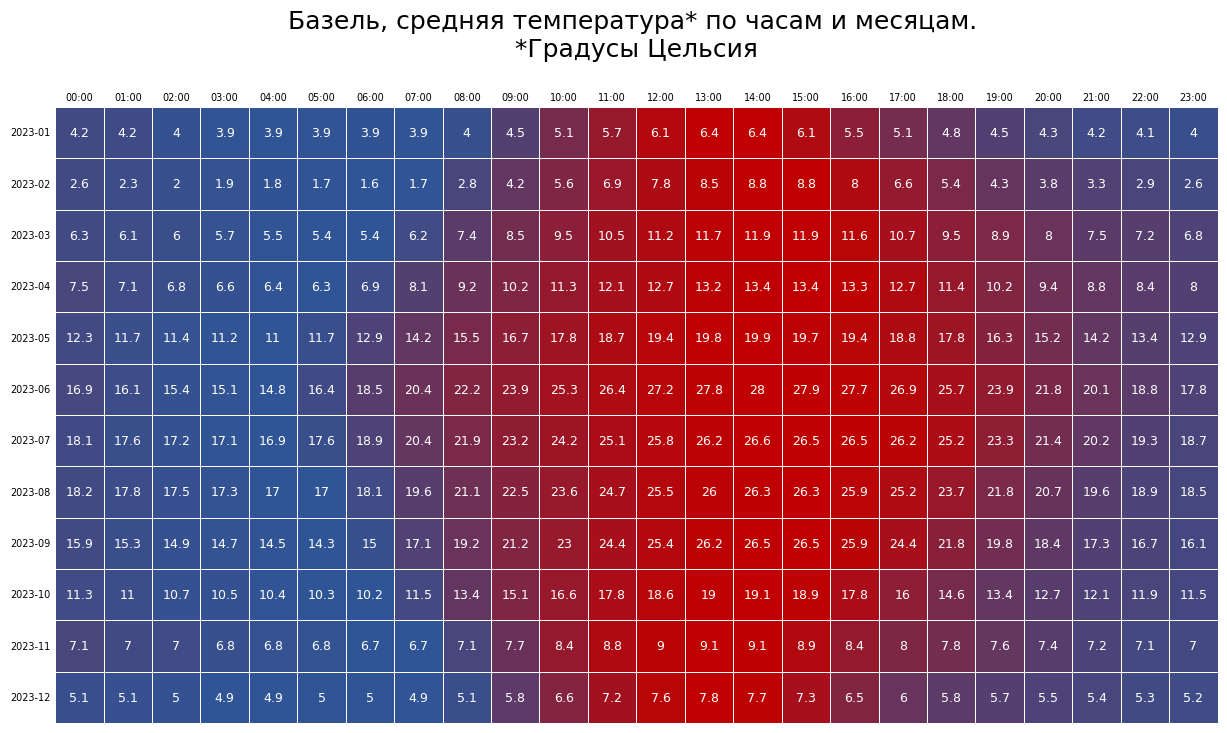

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(norm_temp_p, annot=temp_p.T.round(1), fmt='g', cmap=custom_cmap\
                 , annot_kws={'size': 9}, cbar=False, linewidths=0.5, linecolor='white', vmin=0,vmax=1
                )
plt.title("Базель, средняя температура* по часам и месяцам. \n *Градусы Цельсия \n", fontsize=18)
ax.set(xlabel="", ylabel="")
ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
plt.show()

Самая высокая температура наблюдается с 13:00 до 15:00 часов.
Наиболее широкий диапазон высокой температуры относительно суток наблюдается в июне. Наиболее узкий в декабре - январе.  